
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

## The Data

**Download the fashion mnist dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset") 

There are  60000 images in the training dataset
There are  10000 images in the test dataset


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [4]:
X_train[6].shape

(28, 28)

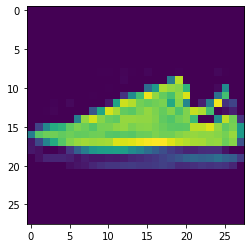

In [5]:
plt.imshow(X_train[6])

In [6]:
y_train[6]

7

In [7]:
y_train.shape

(60000,)

In [8]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

In [9]:
classes[int(y_train[6])]

'Sneaker'

In [10]:
int(np.random.randint(low=0, high=60000, size=1)) 

36204

In [11]:
X_train[int(np.random.randint(low=0, high=60000, size=1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0, 117, 193,
         13,   0,   0,   0,  52,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   1,   0, 144, 206, 200,
        255, 162, 175, 173, 202,  83,   0,   5,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 224, 195, 156,
        156, 179, 208, 164, 175, 191,  15,   0,   0,   1,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  27, 110, 177, 181, 191, 212,
        168,  57, 141, 197, 175, 162, 168, 141,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,  27, 193, 189, 152, 137, 117, 166,
        208,  96, 139, 171, 135, 113, 139, 158, 198, 117,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0, 131, 152, 141, 152, 144, 146, 129,
        164,  86, 127, 141, 139, 144, 137, 135, 141, 158,   9,   0,   0,
          0,   0],
       [  

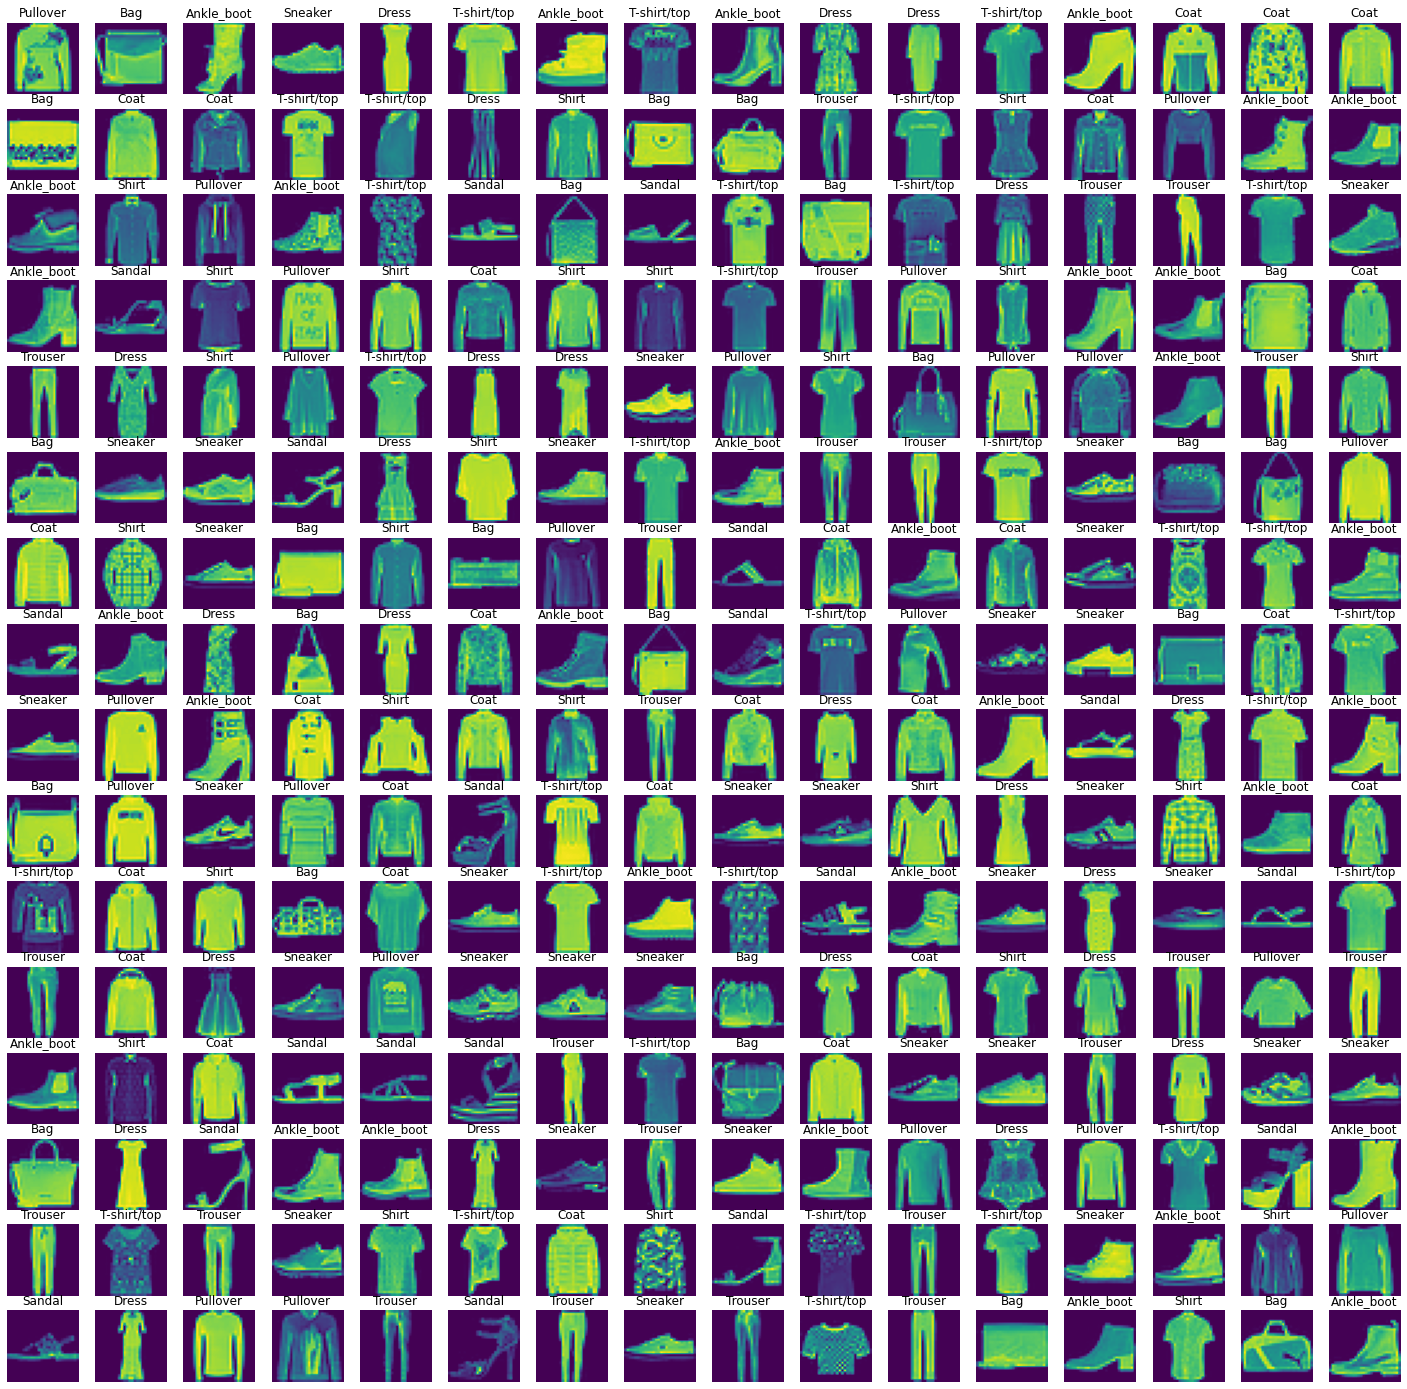

In [12]:
plt.figure(figsize=(25, 25))
for i in range(256):                                               # 256 tane resim ciz (256 dahil degil)
    rand_index = int(np.random.randint(low=0, high=60000, size=1)) # 0-60000 arasinda random bir deger döndür.
    plt.subplot(16, 16, i+1)                                       # label=classes[int(y_train[rand_index])] de eklenebilirdi.
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])                   # y_train' deki class' a karsilik gelen class ismini getir.
    plt.imshow(X_train[rand_index])    

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [13]:
X_train[6].min()

0

In [14]:
X_train[6].max()

255

In [15]:
print(X_train.max())
print(X_test.max())

255
255


In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255                      # Train setleri 3 boyutlu array halinde (32x32x3). Her bir pixel' i 255' e bölecek.
X_test /= 255

In [17]:
print(X_train.min())
print(X_test.min())
print(X_train.max())
print(X_test.max())

0.0
0.0
1.0
1.0


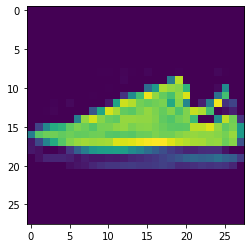

In [18]:
plt.imshow(X_train[6])

**Reshape the X into 4 dimension**

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [24]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) 
* strides=(1,1)
* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [30]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 6ms/step - loss: 0.3906 - accuracy: 0.8613 - val_loss: 0.3052 - val_accuracy: 0.8902
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2636 - accuracy: 0.9053 - val_loss: 0.2929 - val_accuracy: 0.8943
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2260 - accuracy: 0.9200 - val_loss: 0.2743 - val_accuracy: 0.9044
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2011 - accuracy: 0.9282 - val_loss: 0.2764 - val_accuracy: 0.9066
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1832 - accuracy: 0.9346 - val_loss: 0.2615 - val_accuracy: 0.9111
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1672 - accuracy: 0.9406 - val_loss: 0.2698 - val_accuracy: 0.9131
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1551 - accuracy: 0.9453 - val_loss: 0.2734 - val_ac

**Plot values of metrics you used in your model.**

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.390625,0.861350,0.305150,0.8902
1,0.263575,0.905283,0.292896,0.8943
2,0.226016,0.920017,0.274334,0.9044
3,0.201100,0.928167,0.276360,0.9066
4,0.183213,0.934617,0.261525,0.9111


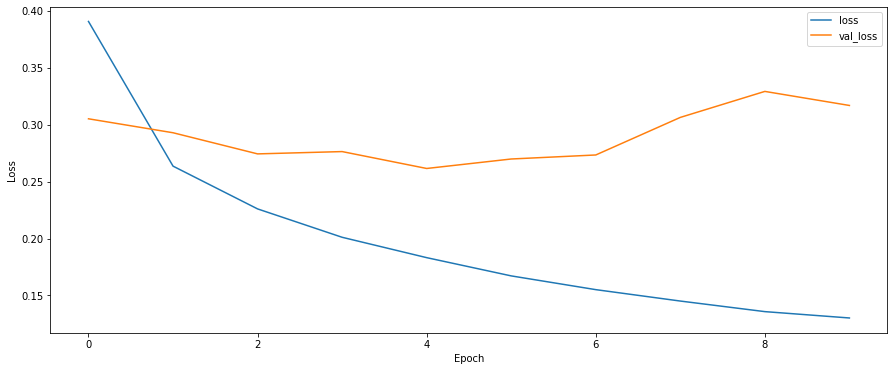

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

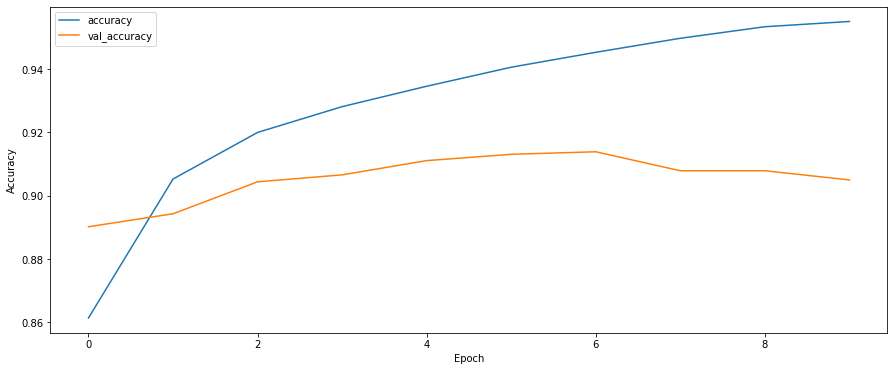

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [37]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1225 - accuracy: 0.9580 - val_loss: 0.3525 - val_accuracy: 0.9032
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1161 - accuracy: 0.9603 - val_loss: 0.3325 - val_accuracy: 0.9057
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1105 - accuracy: 0.9624 - val_loss: 0.3517 - val_accuracy: 0.9110
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1056 - accuracy: 0.9639 - val_loss: 0.3431 - val_accuracy: 0.9110
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1017 - accuracy: 0.9657 - val_loss: 0.4092 - val_accuracy: 0.9115
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0985 - accuracy: 0.9668 - val_loss: 0.4436 - val_accuracy: 0.9090
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0938 - accuracy: 0.9689 - val_loss: 0.3985 - val_ac

**Plot values of metrics you used in your model.**

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.122480,0.958017,0.352540,0.9032
1,0.116140,0.960300,0.332503,0.9057
2,0.110521,0.962367,0.351749,0.9110
3,0.105551,0.963883,0.343079,0.9110
4,0.101722,0.965700,0.409196,0.9115


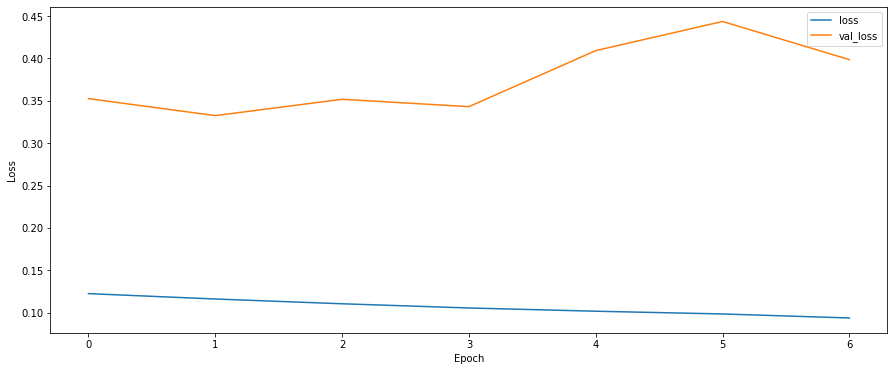

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

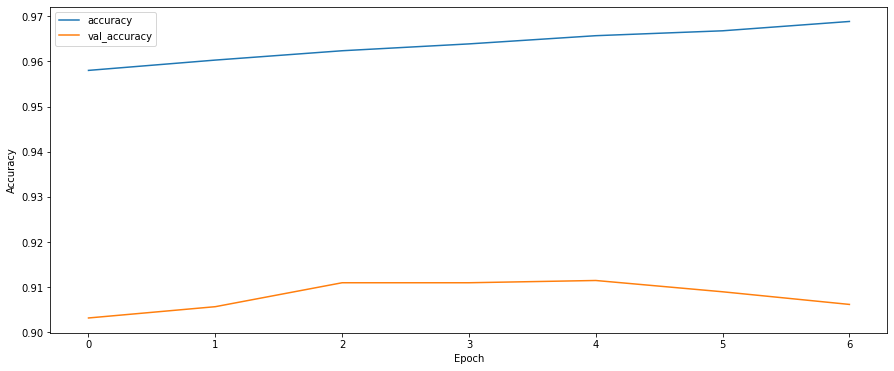

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [42]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [43]:
preds = model.predict(X_test)

In [44]:
predictions = np.argmax(preds, axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.91      0.85      1000
           3       0.87      0.94      0.90      1000
           4       0.86      0.84      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.80      0.68      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.39851170778274536
Test accuracy: 0.9061999917030334


# Prediction

In [47]:
my_image = X_test[6]

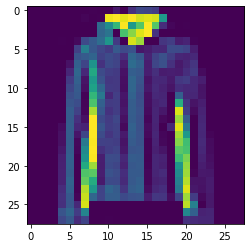

In [48]:
plt.imshow(my_image.reshape(28,28));

In [50]:
model.predict(my_image.reshape(1,28,28,1))

array([[1.8516077e-15, 1.0010504e-28, 8.7119888e-06, 3.8038707e-19,
        9.9998832e-01, 9.2819236e-23, 2.9210241e-06, 1.2458527e-18,
        1.5691487e-25, 1.0163913e-29]], dtype=float32)

In [51]:
np.argmax(model.predict(my_image.reshape(1,28,28,1)), axis=1)

array([4])

# End of Assignment

In [ ]:
model.save("fashionmnist.h5")